# **COMP 2211 Exploring Artificial Intelligence**
## Lab 1 NumPy

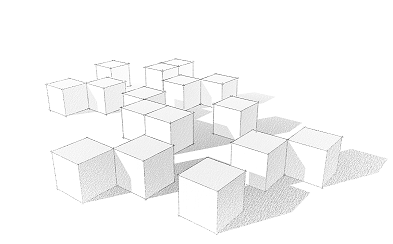

## Before We Begin

Run the code in the following cell. It will import the necessary packages used in the tasks.

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-Task: Read the Manual

The lab session is very short, and the capability of NumPy is vast. It is impossible for us to cover everything in NumPy in such a short lab session. To master it, you have to:
1. Read the documentation
2. Write a lot
3. Write more

If there's anything unclear in the notes, you can approach us, but most of the time, it would be much quicker if you Google it yourself. There are a vast amount of resources out there on the internet. It is not a problem to copy and paste, but you need to understand why and how people write the codes.

If you search for examples and documentation, Google will always be your good friend.

## Background of Image Processing ##

A digital image is a two-dimensional grid of intensity values, represented by $I(x,y)$, where $x$ and $y$ are coordinates, and the value of $I$ at coordinates $(x,y)$ is called the intensity of the image.

*   Pixels: Short for Picture Element. A pixel is a single point (dot) in an image
*   Dimensions: The dimensions of images are specified by the width and height of the image.
> Image width is the number of columns in the image<br/>
> Image height is the number of rows in the image<br/><br/>
> 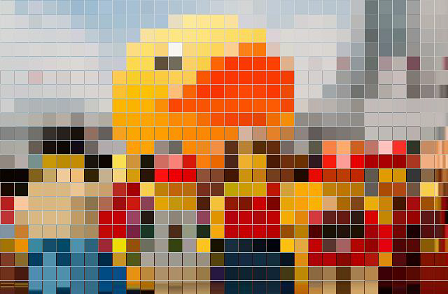 <br/>
> An image of dimensions $32\times21$ (i.e., image width = 32 pixels, image height = 21 pixels)

Color images have intensity from the darkest and lightest of 3 colors: red, green, and blue (RGB). The mixtures of these color intensities are also referred to as 24-bit color images. An 8-bit intensity range has 256 possible values, 0 to 255.

Examples:
*   Black: RGB = (0, 0, 0)
*   White: RGB = (255, 255, 255)
*   Red: RGB = (255, 0, 0)
*   Green: RGB = (0, 255, 0)
*   Blue: RGB = (0, 0, 255)
*   Yellow: RGB = (255, 255, 0)

## Load the Image Data
In this lab, we will use the *face* image from the [scipy.misc](https://docs.scipy.org/doc/scipy/reference/misc.html#module-scipy.misc) module. The following code cell loads the image.

In [3]:
img = misc.face()

C:\Users\miruh\AppData\Local\Temp\ipykernel_5616\347613074.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


Now, *img* is a Numpy 3D array, representing its RGB channels, as we can see below:

In [4]:
print(type(img))
print(img.shape)   # It indicates that we have an array of 3 matrices, each having shape 768*1024.

<class 'numpy.ndarray'>
(768, 1024, 3)


Furthermore, using the *ndim* property of this array, we can see that

In [5]:
print(img.ndim)

3


We can see the image as follows:

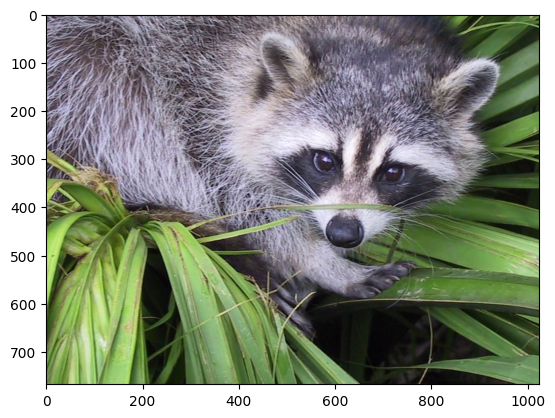

In [6]:
plt.imshow(img)
plt.show()

# Task1 Basic Properties of Image Data

## Task 1.1 Get the Matrix of Each Color Channel

In [7]:
"""
    TODO: Assign each color channel to a separate matrix using the slice syntax.
"""
### START CODE HERE ###
red_channel = img[0]
green_channel = img[1]
blue_channel = img[2]
### END CODE HERE ### 

## Task 1.2 Visualization of Transpose

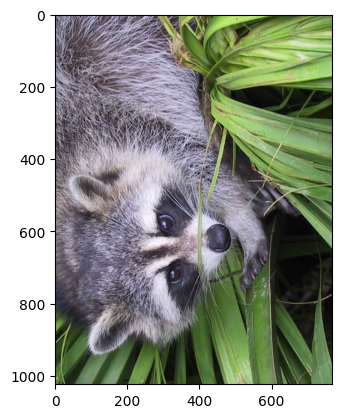

In [8]:
"""
    TODO: Now, try swapping the first and second axis of the image, 
    how are these images compared to the original images?
    Save to the variable ```transposed_images```.
"""
### START CODE HERE ### (≈ 1 line of code)
transposed_img = np.transpose(img,[1,0,2])
### END CODE HERE ###


plt.imshow(transposed_img)

# Task 2 Image Enhancement (Image Augmentation): Contrast Adjustment

If you have fiddled with your electronic devices for a bit, you might have heard of contrast adjustment. In short, it's a way to make the	image	features stand out more clearly. In this lab, we will walk you through one of the simpler ways to adjust contrast.

First, let's talk about how an image is represented in a multi-dimensional array.

Usually, images are represented in multi-dimensional arrays with the shape either like $(H, W, C)$ or $(C, H, W)$ (Which we have shown in the previous task). And usually, an Image contains 3 channels: red, green, and blue. So, in some sense, you can think as if three images of different channels got smashed and turned into one image.

## Task 2.1: Greyscale

For the contrast adjustment, we first need to convert our image to greyscale. To do so, we would calculate the new pixel value like this:

$$
    0.299 * R + 0.587 * G + 0.114 * B
$$

, where R, G, B represent red, green, and blue values, respectively.

To practice coding in NumPy, we will ask you to use `np.dot` (or `@`) (But you can also do it on each channel individually). It does matrix multiplication (in linear algebra way instead of elementwise). The shape of the matrices would look like: `(m, n)@(n, k)=(m, k)`

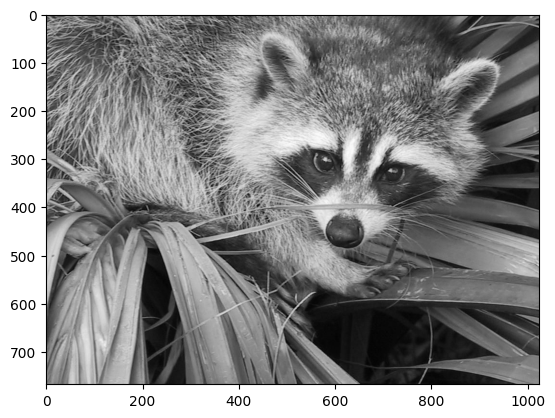

In [9]:
"""
    TODO: Compute the greyscaled version of the image to the variable ```grey_image```
"""
luminance = np.array([0.299, 0.587, 0.114]) # Luminance coefficients
### START CODE HERE ### (≈ 1 line of code. Hint: Try fiddle around by looking at the shape of the arrays. The result image might or might not have 3 channels)
grey_img = img @ luminance
### END CODE HERE ###
plt.imshow(grey_img, cmap='gray', vmin=0, vmax=255)

## Task 2.2 Take Ratio

Lastly, the new pixel value of the adjusted image would be:

$$
    I_{new}^{ij} = \alpha\times I_{grey}^{ij} + (1-\alpha)\times I_{ori}^{ij}
$$

where $I_{grey}$ is the greyscale image, $I_{ori}$ is the original image, $\alpha$ is a value between 0 (inclusive) and 1 (inclusive) and in this example, we take $\alpha=0.5$.

(Hint: the operations in this formula are pixel-wise, as hinted by the superscript ${}^{ij}$. You might want to reshape the greyscale image depending on how you code the previous step)

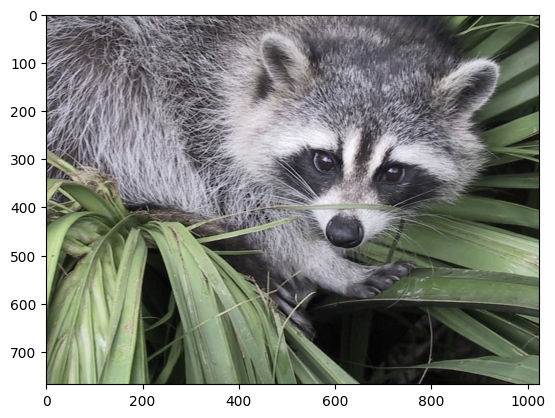

In [10]:
"""
    TODO: Compute the new image from the grey image to the variable ```new_image```
"""

alpha = 0.5
### START CODE HERE ### (≈ 1 line of code)
new_img = alpha * grey_img[:,:,np.newaxis] + (1-alpha) * img
### END CODE HERE ###

plt.imshow(new_img.astype(np.uint8))

# Task 3 Familiarize with NumPy Functions: Generating and Plotting Exponential Curve

We have done some matrix arithmetic in the previous tasks.
However, there are still tons of Numpy functions we haven't gone through or didn't talk about. So, from these tasks, instead of teaching you step by step how to do it, we hope you can start finding answers through the internet (e.g. Google). But of course, not everyone catches up quickly and knows what even to Google. In this case, don't hesitate and feel free to ask questions ;).

In this task, we will plot a simple function, exponential curve $y=e^t$. But this time, we'll instead demonstrate an example code. We hope you can learn from it without us explaining (although there're comments) and write your own slightly simpler version. It's just like how you typically search for answers online. (So technically, now you're my machine learning model. :DDD)

We will give you the data (drawing some graph) and label (example code and image), and you need to take input (drawing exponential graph) and output something (code and image). Please try your best to obtain the answers by searching on the internet.

C:\Users\miruh\AppData\Local\Temp\ipykernel_5616\2027519150.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # In normal python program (i.e. not using notebook but running normal python program), you need to run this line in order to show what you have plot


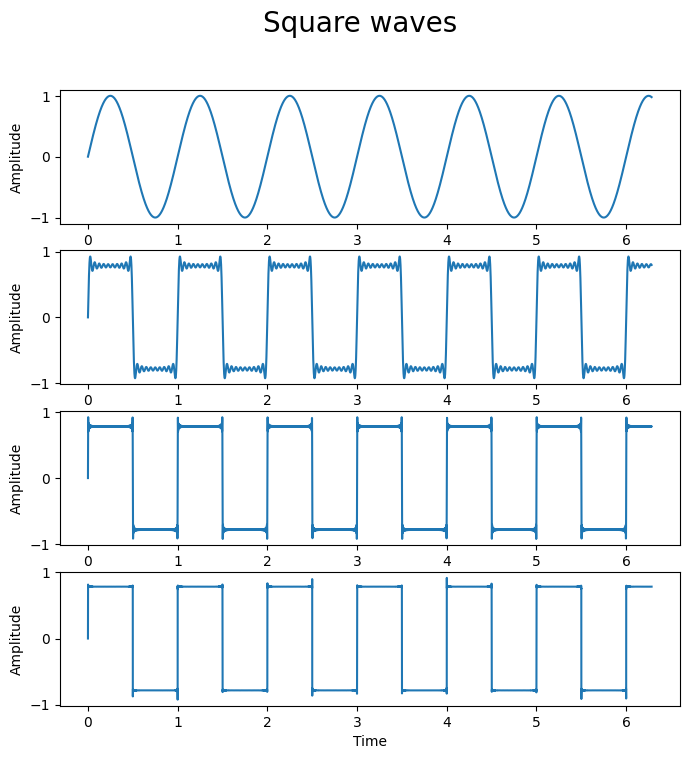

In [12]:
import numpy as np
import matplotlib.pyplot as plt

"""
    Demonstration of Fourier Decomposition of Square Waves
    Referenced from: https://en.wikipedia.org/wiki/Square_wave
"""

t = np.linspace(0, np.pi * 2, 10000) # Create array with 10,000 values ranging from 0 to 2*pi

fig, axs = plt.subplots(4, 1, figsize=(8,8)) # Create plot with 4 rows and 1 column. Is that really needed for plotting 1 simple exponential curve?
fig.suptitle('Square waves', fontsize=20) # Naming the figure for the fancy presentation.

for i in range(4):
    stack_of_functions = [((2 * k + 1)**-1) * np.sin(2 * np.pi * t * (2 * k + 1)) for k in range(10 ** i)] # Fourier decomposition of square waves
    stack_of_functions = np.vstack(stack_of_functions) # Turn array of 1d ndarray to 2d ndarray.

    square_wave = stack_of_functions.sum(axis=0) # Sum all sine waves
    axs[i].set(xlabel='Time', ylabel='Amplitude') # Fancy axis labeling
    axs[i].plot(t, square_wave) # Plot the graphs

fig.show() # In normal python program (i.e. not using notebook but running normal python program), you need to run this line in order to show what you have plot

By referencing the example above, please plot the curve of $y=e^t$. The domain (t-axis/x-axis) could be anything.

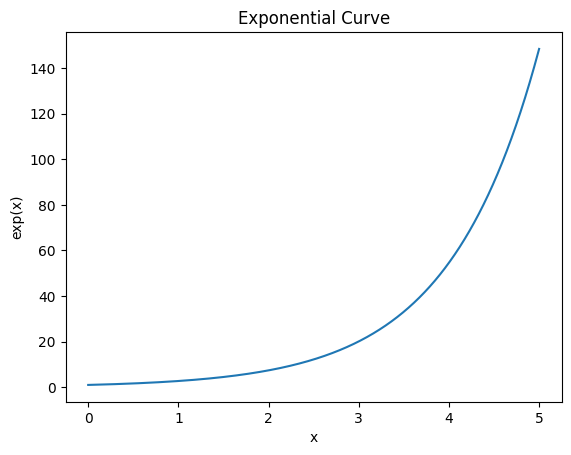

In [18]:
### START OF YOUR CODE ###
# GOAL: Plot any exponential curve #
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 5, 10000)
y = np.exp(x)

# Plot the exponential curve
plt.plot(x, y)

# Add labels and title
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('Exponential Curve')

# Show the plot
plt.show()

### END OF YOUR CODE ###
# There's no unique answer for this

In [ ]:
### This is the end of the lab
### Referenced from COMP2211 Notes, NumPy official documentation, and stackoverflow